In [ ]:
# Neural Network for 1Dimensional problem. Investigating the learning rate:

In [2]:
import numpy as np
from scipy import special
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from scipy.special import erf
import tensorflow as tf
import pandas as pd
import scipy.stats as stats

In [3]:
# Activation functions:

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0.01*x, x)

def leaky_relu(x, alpha=0.01):
    return np.maximum(alpha * x, x)

# Derivatives:

def sigmoid_derivative(x):
    sigmoid_x = sigmoid(x)
    return sigmoid_x * (1 - sigmoid_x)

def tanh_derivative(x):
    return 1 - np.tanh(x) ** 2

def relu_derivative(x):
    return np.where(x > 0, 1, 0.01)

def leaky_relu_derivative(x, alpha=0.01):
    return np.where(x > 0, 1, alpha)

Test sample 1: Predicted value = 0.29871432891382865, True value = 0.2780938089004099
Test sample 2: Predicted value = 0.2669857774076407, True value = 0.14379416853260754
Test sample 3: Predicted value = 0.2990099297791381, True value = 0.35749320630608106
Test sample 4: Predicted value = 0.34004263065826845, True value = 0.4394667861173155
Test sample 5: Predicted value = 0.2990206114748722, True value = 0.4099760861738916
Test sample 6: Predicted value = 0.29855520405041724, True value = 0.20363226847302493
Test sample 7: Predicted value = 0.30096756273709396, True value = 0.3230545437859139
Test sample 8: Predicted value = 0.2986367788584585, True value = 0.3701275230267077
Test sample 9: Predicted value = 0.298562830555536, True value = 0.3274817932998733
Test sample 10: Predicted value = 0.29855612744014143, True value = 0.34776938670709867
Test sample 11: Predicted value = 0.29854947382011066, True value = 0.1883410083315542
Test sample 12: Predicted value = 0.2985211668284253, 

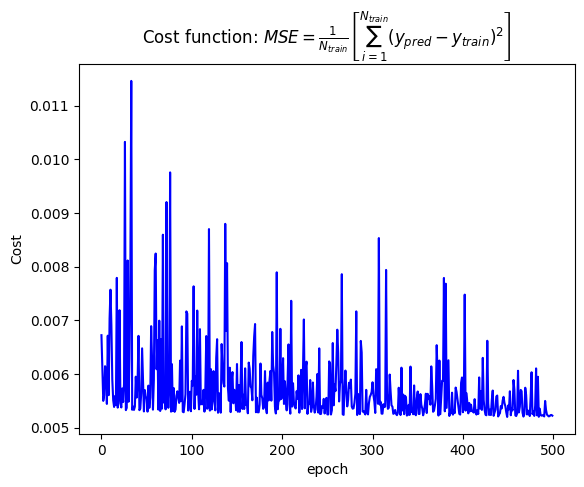

In [14]:
# learning rate 0.001:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

np.random.seed(12)
# Define the number of data points to generate
N = 1000

# Define the parameter values
A = 10
epsilon = 0.05

x_c = np.random.uniform(0.1, 0.5, size = N)
g   = np.random.uniform(-1,1,size = N)
p = g - 0.5 * A * np.sqrt(np.pi * epsilon) * (erf(x_c / np.sqrt(epsilon)) + erf((1 - x_c) / np.sqrt(epsilon)))

# Generate data points
X = p  # x = p = u'(0)
y = x_c

# Split the data: x,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.001

# epochs:
epochs = 500

# Activation function choices:
function = [sigmoid, leaky_relu, leaky_relu, sigmoid, leaky_relu, leaky_relu, tanh]
drv_function = [sigmoid_derivative, leaky_relu_derivative, leaky_relu_derivative, sigmoid_derivative, 
                leaky_relu_derivative, leaky_relu_derivative, tanh_derivative]
    
# Define the neural network architecture
input_size = 1
hidden_size = [64,32,32,100,32,100]
# List of hidden layer sizes
output_size = 1

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J_001 = np.zeros(epochs) # cost function

# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))

# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train[j]
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train[j]) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train[j]
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        J_001[ep] += denom*(((abs(y_train[j] - a))**2).sum())

# Test data:
y_pred_001 = np.zeros(N_test)

for k in range(N_test):
    # Forward propagation
    a = X_test[k]
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred_001[k] = function[-1](z) # output

# Plot the Cost function:
plt.plot(range(epochs),J_001,color='blue')
plt.xlabel("epoch")
plt.ylabel('Cost')
plt.title(r"Cost function: $MSE = \frac{1}{N_{train}}\left[ \sum_{i=1}^{N_{train}}\left(y_{pred} - y_{train}\right)^2 \right]$")

# Predict values:
# Print the predicted values for the test set
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_001[i]}, True value = {y_test[i]}")
    
# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

Test sample 1: Predicted value = 0.298793457911028, True value = 0.2780938089004099
Test sample 2: Predicted value = 0.30687248266303024, True value = 0.14379416853260754
Test sample 3: Predicted value = 0.3127779186208773, True value = 0.35749320630608106
Test sample 4: Predicted value = 0.3539654248746755, True value = 0.4394667861173155
Test sample 5: Predicted value = 0.3134356921109304, True value = 0.4099760861738916
Test sample 6: Predicted value = 0.29906611524681176, True value = 0.20363226847302493
Test sample 7: Predicted value = 0.3039426330125637, True value = 0.3230545437859139
Test sample 8: Predicted value = 0.2989296679302754, True value = 0.3701275230267077
Test sample 9: Predicted value = 0.299054104615073, True value = 0.3274817932998733
Test sample 10: Predicted value = 0.2990646698761918, True value = 0.34776938670709867
Test sample 11: Predicted value = 0.29907503237936806, True value = 0.1883410083315542
Test sample 12: Predicted value = 0.29911771781773555, Tru

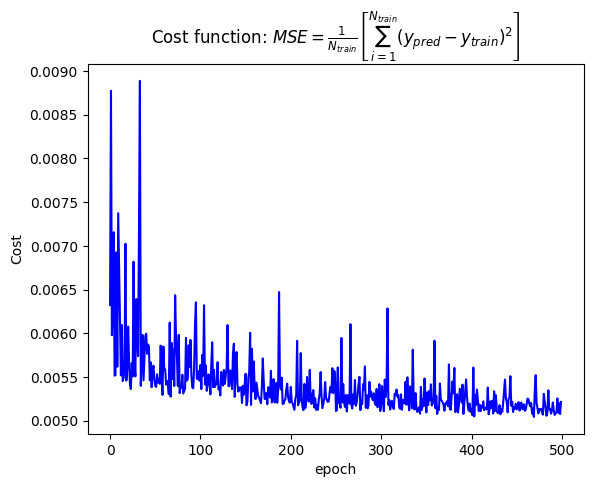

In [15]:
# learning rate 0.01
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

np.random.seed(12)
# Define the number of data points to generate
N = 1000

# Define the parameter values
A = 10
epsilon = 0.05

x_c = np.random.uniform(0.1, 0.5, size = N)
g   = np.random.uniform(-1,1,size = N)
p = g - 0.5 * A * np.sqrt(np.pi * epsilon) * (erf(x_c / np.sqrt(epsilon)) + erf((1 - x_c) / np.sqrt(epsilon)))

# Generate data points
X = p  # x = p = u'(0)
y = x_c

# Split the data: x,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.01

# epochs:
epochs = 500

# Activation function choices:
function = [sigmoid, leaky_relu, leaky_relu, sigmoid, leaky_relu, leaky_relu, tanh]
drv_function = [sigmoid_derivative, leaky_relu_derivative, leaky_relu_derivative, sigmoid_derivative, 
                leaky_relu_derivative, leaky_relu_derivative, tanh_derivative]
    
# Define the neural network architecture
input_size = 1
hidden_size = [64,32,32,100,32,100]
# List of hidden layer sizes
output_size = 1

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J_01 = np.zeros(epochs) # cost function

# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))

# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train[j]
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train[j]) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train[j]
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        J_01[ep] += denom*(((abs(y_train[j] - a))**2).sum())

# Test data:
y_pred_01 = np.zeros(N_test)

for k in range(N_test):
    # Forward propagation
    a = X_test[k]
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred_01[k] = function[-1](z) # output

# Plot the Cost function:
plt.plot(range(epochs),J_01,color='blue')
plt.xlabel("epoch")
plt.ylabel('Cost')
plt.title(r"Cost function: $MSE = \frac{1}{N_{train}}\left[ \sum_{i=1}^{N_{train}}\left(y_{pred} - y_{train}\right)^2 \right]$")

# Predict values:
# Print the predicted values for the test set
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_01[i]}, True value = {y_test[i]}")
    
# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

Test sample 1: Predicted value = 0.3030134538626745, True value = 0.2780938089004099
Test sample 2: Predicted value = 0.27392429304966454, True value = 0.14379416853260754
Test sample 3: Predicted value = 0.30535825784888376, True value = 0.35749320630608106
Test sample 4: Predicted value = 0.34804094869557267, True value = 0.4394667861173155
Test sample 5: Predicted value = 0.30541614917558163, True value = 0.4099760861738916
Test sample 6: Predicted value = 0.3014996988208996, True value = 0.20363226847302493
Test sample 7: Predicted value = 0.303627814476477, True value = 0.3230545437859139
Test sample 8: Predicted value = 0.3021481504188557, True value = 0.3701275230267077
Test sample 9: Predicted value = 0.30150289881619075, True value = 0.3274817932998733
Test sample 10: Predicted value = 0.3015000795219398, True value = 0.34776938670709867
Test sample 11: Predicted value = 0.30149737753925604, True value = 0.1883410083315542
Test sample 12: Predicted value = 0.30149202960687915,

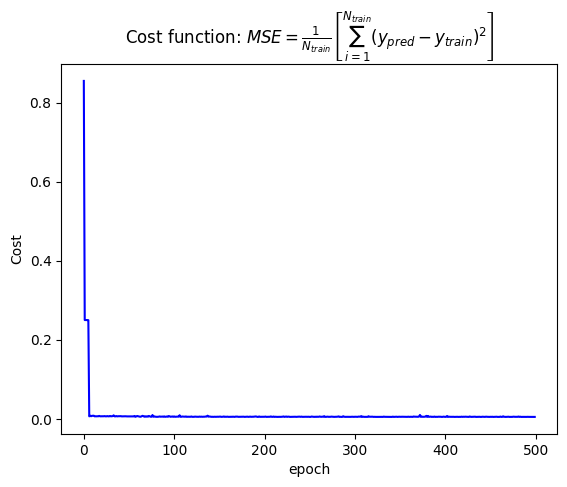

In [16]:
# learning rate 0.1:
import numpy as np
from scipy.special import erf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import time
import matplotlib.pyplot as plt

# Start the timer
start_time = time.time()

np.random.seed(12)
# Define the number of data points to generate
N = 1000

# Define the parameter values
A = 10
epsilon = 0.05

x_c = np.random.uniform(0.1, 0.5, size = N)
g   = np.random.uniform(-1,1,size = N)
p = g - 0.5 * A * np.sqrt(np.pi * epsilon) * (erf(x_c / np.sqrt(epsilon)) + erf((1 - x_c) / np.sqrt(epsilon)))

# Generate data points
X = p  # x = p = u'(0)
y = x_c

# Split the data: x,y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state = 301197)

N_train = X_train.shape[0]
N_test = X_test.shape[0]

# Learning rate:
alpha = 0.1

# epochs:
epochs = 500

# Activation function choices:
function = [sigmoid, leaky_relu, leaky_relu, sigmoid, leaky_relu, leaky_relu, tanh]
drv_function = [sigmoid_derivative, leaky_relu_derivative, leaky_relu_derivative, sigmoid_derivative, 
                leaky_relu_derivative, leaky_relu_derivative, tanh_derivative]
    
# Define the neural network architecture
input_size = 1
hidden_size = [64,32,32,100,32,100]
# List of hidden layer sizes
output_size = 1

# Initialize weights and biases for each layer
np.random.seed(12)
weights = []
biases  = []

# input to hidden layer:
weights.append(0.5 - np.random.rand(hidden_size[0], input_size))
biases.append(np.zeros([hidden_size[0], 1]))
J_1 = np.zeros(epochs) # cost function

# Hidden layer:
for i in range(1, len(hidden_size)):
    weights.append(0.5 - np.random.rand(hidden_size[i], hidden_size[i-1]))
    biases.append(np.zeros([hidden_size[i], 1]))

# Output layer:
weights.append(0.5 - np.random.rand(output_size, hidden_size[-1]))
biases.append(np.zeros([output_size, 1]))

# Initialize gradients
grad_weights = [np.zeros_like(w) for w in weights]
grad_biases  = [np.zeros_like(b) for b in biases]
 
for ep in range(epochs):
    ransel = np.random.permutation(N_train)
    for i in range(N_train):
        # Forward propagation:
        # select a random without replacement:
        j = ransel[i]
        a = X_train[j]
        activations = [a]
        # Initialize z values
        zs = []
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            zs.append(z)
            a = function[k](z)   
            activations.append(a)
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        zs.append(z)
        a = function[-1](z) # output
        activations.append(a)
        
        # Backpropagation:
        delta = (activations[-1] - y_train[j]) * drv_function[-1](zs[-1])
        grad_weights[-1] = np.dot(delta, activations[-2].T)
        grad_biases[-1]  = delta
        
        # Output to hidden layers:
        for k in range(len(hidden_size) - 1, 0, -1):
            z = zs[k]
            delta = np.dot(weights[k+1].T, delta) * drv_function[k](z)
            grad_weights[k] = np.dot(delta, activations[k].T)
            grad_biases[k]  = delta
        
        # Input to Hidden layer:
        z = zs[0]
        delta = np.dot(weights[1].T, delta) * drv_function[0](z)
        grad_weights[0] = np.dot(delta, activations[0].T)
        grad_biases[0]  = delta
        
        # Gradient descent update:
        for k in range(len(hidden_size)+1):
            weights[k] -= alpha * grad_weights[k]
            biases[k]  -= alpha * grad_biases[k]
            
    for j in range(N_train):
        a = X_train[j]
        
        # Hidden layer loop:
        for k in range(len(hidden_size)):
            z = np.dot(weights[k], a) + biases[k]
            a = function[k](z)   
        
        # Hidden layer to Output:
        z = np.dot(weights[-1], a) + biases[-1]
        a = function[-1](z) # output
        denom = 1 / (2 * N_train)
        J_1[ep] += denom*(((abs(y_train[j] - a))**2).sum())

# Test data:
y_pred_1 = np.zeros(N_test)

for k in range(N_test):
    # Forward propagation
    a = X_test[k]
        
    # Hidden layer loop:
    for l in range(len(hidden_size)):
        z = np.dot(weights[l], a) + biases[l]
        a = function[l](z)   
        
    # Hidden layer to Output:
    z = np.dot(weights[-1], a) + biases[-1]
    y_pred_1[k] = function[-1](z) # output

# Plot the Cost function:
plt.plot(range(epochs),J_1,color='blue')
plt.xlabel("epoch")
plt.ylabel('Cost')
plt.title(r"Cost function: $MSE = \frac{1}{N_{train}}\left[ \sum_{i=1}^{N_{train}}\left(y_{pred} - y_{train}\right)^2 \right]$")

# Predict values:
# Print the predicted values for the test set
for i in range(len(X_test)):
    print(f"Test sample {i+1}: Predicted value = {y_pred_1[i]}, True value = {y_test[i]}")
    
# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

# Print the elapsed time
print("Elapsed time: ", elapsed_time, " seconds")

0.0051998676686749205
0.005045120921648659
0.005113943458654849


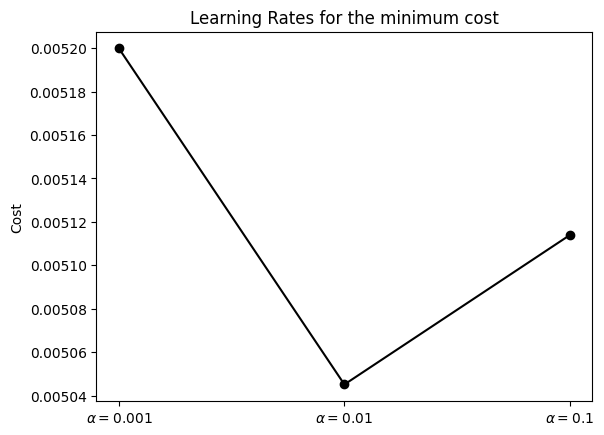

In [17]:
# Graphs for learning rate:
print(np.min(J_001))
print(np.min(J_01))
print(np.min(J_1))

plt.plot([1, 2, 3],[np.min(J_001),np.min(J_01),np.min(J_1)],color = 'black',marker = 'o')
# Add title and labels to the plot
plt.title('Learning Rates for the minimum cost')
# Set custom tick labels on the x-axis with LaTeX formatting
plt.xticks([1, 2, 3],[r'$\alpha = 0.001$', r'$\alpha = 0.01$', r'$\alpha = 0.1$'])
plt.ylabel('Cost')
plt.show()

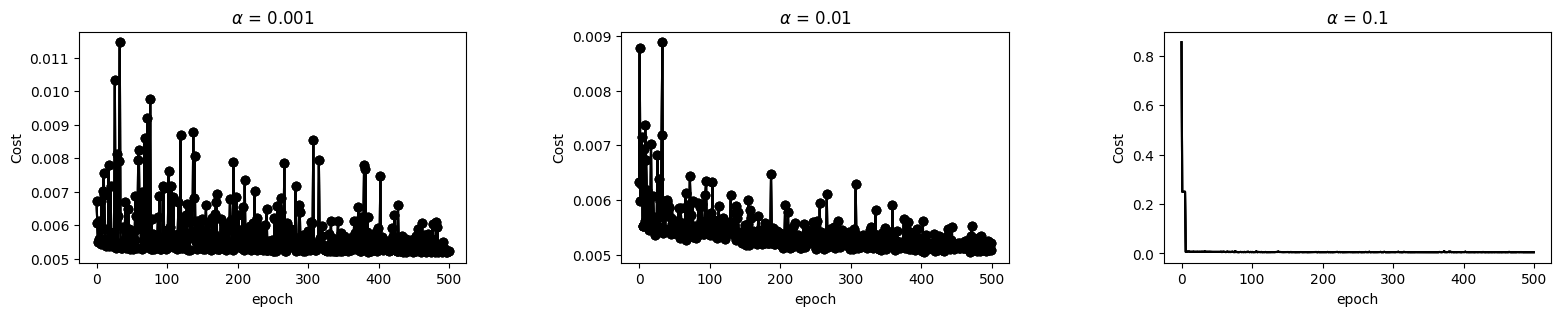

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize = (19,3))

for ax in enumerate(axes.flatten()):
    axes[0].plot(range(epochs),J_001,color='black',marker = 'o')
    axes[0].set_xlabel("epoch")
    axes[0].set_ylabel('Cost')
    axes[0].set_title(r'$\alpha$ = 0.001')
    
    axes[1].plot(range(epochs),J_01,color='black',marker='o')
    axes[1].set_xlabel("epoch")
    axes[1].set_ylabel('Cost')
    axes[1].set_title(r'$\alpha$ = 0.01')
    
    axes[2].plot(range(epochs),J_1,color='black')
    axes[2].set_xlabel("epoch")
    axes[2].set_ylabel('Cost')
    axes[2].set_title(r'$\alpha$ = 0.1')
    
# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.4)

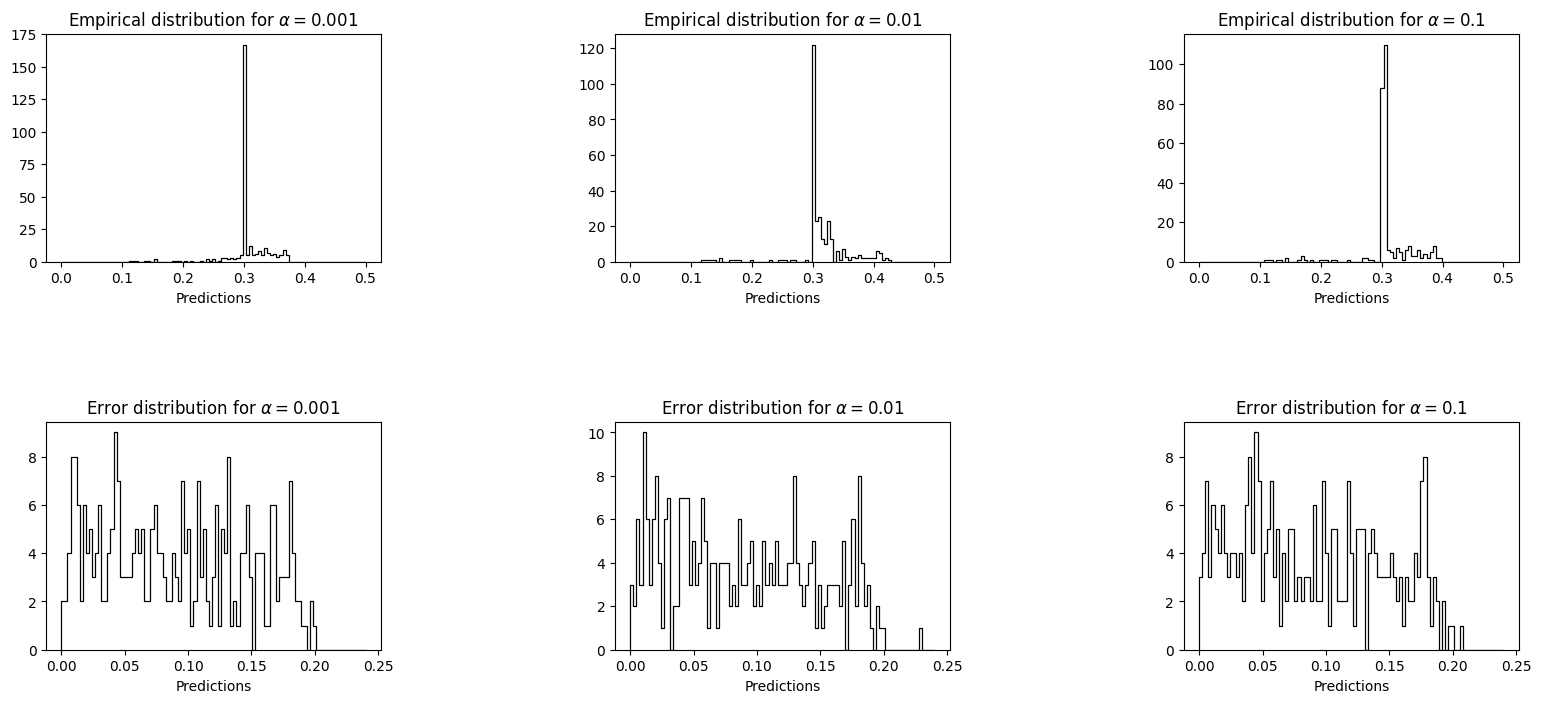

In [19]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize = (19,8))

for ax in enumerate(axes.flatten()):
    
    axes[0,0].hist(y_pred_001,color='black',bins=np.linspace(0,0.5 , 100), linewidth=0.75,histtype=u'step')
    axes[0,0].set_title(r"Empirical distribution for $\alpha = 0.001$")
    axes[0,0].set_xlabel('Predictions')
    
    axes[0,1].hist(y_pred_01,color='black',bins=np.linspace(0,0.5 , 100), linewidth=0.75,histtype=u'step')
    axes[0,1].set_title(r"Empirical distribution for $\alpha = 0.01$")
    axes[0,1].set_xlabel('Predictions')
    
    axes[0,2].hist(y_pred_1,color='black',bins=np.linspace(0,0.5 , 100), linewidth=0.75,histtype=u'step')
    axes[0,2].set_title(r"Empirical distribution for $\alpha = 0.1$")
    axes[0,2].set_xlabel('Predictions')
  
    axes[1,0].hist(np.abs(y_test - y_pred_001),color='black',bins=np.linspace(0,0.24 , 100), linewidth=0.75,histtype=u'step')
    axes[1,0].set_title(r"Error distribution for $\alpha = 0.001$")
    axes[1,0].set_xlabel('Predictions')

    axes[1,1].hist(np.abs(y_test - y_pred_01),color='black',bins=np.linspace(0,0.24 , 100), linewidth=0.75,histtype=u'step')
    axes[1,1].set_title(r"Error distribution for $\alpha = 0.01$")
    axes[1,1].set_xlabel('Predictions')

    axes[1,2].hist(np.abs(y_test - y_pred_1),color='black',bins=np.linspace(0,0.24 , 100), linewidth=0.75,histtype=u'step')
    axes[1,2].set_title(r"Error distribution for $\alpha = 0.1$")
    axes[1,2].set_xlabel('Predictions')

    
# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.7)
plt.subplots_adjust(hspace=0.7)

In [20]:
print('The mean for a = 0.1 =',format(np.mean(y_pred_1),".5f"))
print('The mean for a = 0.01 =',format(np.mean(y_pred_01),".5f"))
print('The mean for a = 0.001 =',format(np.mean(y_pred_001),".5f"))

print('The variance for a = 0.1 ='  , format(np.var(y_pred_1),".5f"))
print('The variance for a = 0.01 =' , format(np.var(y_pred_01),".5f"))
print('The variance for a = 0.001 =', format(np.var(y_pred_001),".5f"))

The mean for a = 0.1 = 0.30664
The mean for a = 0.01 = 0.31233
The mean for a = 0.001 = 0.30265
The variance for a = 0.1 = 0.00198
The variance for a = 0.01 = 0.00213
The variance for a = 0.001 = 0.00145


In [21]:
print(J_01[199])
print(J_01[299])
print(J_01[399])
print(J_01[499])

0.005208709563452202
0.005112135568187104
0.005100613583235237
0.0052168208490645475


In [ ]:
# We decide to work with a = 0.01 where epochs = 500. We see above that 